In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [25]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [26]:
df.duplicated().sum()

np.int64(0)

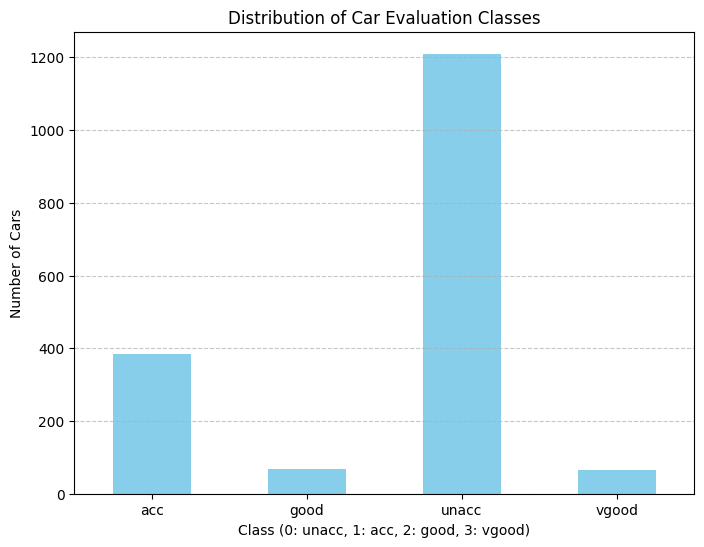

In [27]:
import matplotlib.pyplot as plt

# Get the value counts of the 'class' column
class_distribution = df['class'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Car Evaluation Classes')
plt.xlabel('Class (0: unacc, 1: acc, 2: good, 3: vgood)')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
#Feature Encoding

# Create mapping dictionaries for ordinal data
buying_mapping = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
maint_mapping = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
doors_mapping = {'2': 2, '3': 3, '4': 4, '5more': 5}
persons_mapping = {'2': 2, '4': 4, 'more': 5}
lug_boot_mapping = {'small': 1, 'med': 2, 'big': 3}
safety_mapping = {'low': 1, 'med': 2, 'high': 3}
class_mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

# Apply mappings to the dataframe
df['buying'] = df['buying'].map(buying_mapping)
df['maint'] = df['maint'].map(maint_mapping)
df['doors'] = df['doors'].map(doors_mapping)
df['persons'] = df['persons'].map(persons_mapping)
df['lug_boot'] = df['lug_boot'].map(lug_boot_mapping)
df['safety'] = df['safety'].map(safety_mapping)
df['class'] = df['class'].map(class_mapping)

print("Data Encoded Successfully. Here is the numeric version:")
print(df.head())

Data Encoded Successfully. Here is the numeric version:
   buying  maint  doors  persons  lug_boot  safety  class
0       4      4      2        2         1       1      0
1       4      4      2        2         1       2      0
2       4      4      2        2         1       3      0
3       4      4      2        2         2       1      0
4       4      4      2        2         2       2      0


In [29]:
#Train/Test Split
from sklearn.model_selection import train_test_split

# Separate Features (X) and Target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (1382, 6)
Testing Data Shape: (346, 6)


In [30]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("\nDetailed Report:\n")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 96.82%

Detailed Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       242
           1       0.92      0.95      0.94        77
           2       0.92      0.79      0.85        14
           3       0.86      0.92      0.89        13

    accuracy                           0.97       346
   macro avg       0.92      0.91      0.92       346
weighted avg       0.97      0.97      0.97       346



In [31]:
#Naïve Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize
nb_model = GaussianNB()

# Train
nb_model.fit(X_train, y_train)

# Predict
nb_predictions = nb_model.predict(X_test)

# Evaluate
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naïve Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print("\nDetailed Report:\n")
print(classification_report(y_test, rf_predictions))

Naïve Bayes Accuracy: 75.43%

Detailed Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       242
           1       0.92      0.95      0.94        77
           2       0.92      0.79      0.85        14
           3       0.86      0.92      0.89        13

    accuracy                           0.97       346
   macro avg       0.92      0.91      0.92       346
weighted avg       0.97      0.97      0.97       346



In [32]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize with K=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train
knn_model.fit(X_train, y_train)

# Predict
knn_predictions = knn_model.predict(X_test)

# Evaluate
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print("\nDetailed Report:\n")
print(classification_report(y_test, rf_predictions))

KNN Accuracy: 95.38%

Detailed Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       242
           1       0.92      0.95      0.94        77
           2       0.92      0.79      0.85        14
           3       0.86      0.92      0.89        13

    accuracy                           0.97       346
   macro avg       0.92      0.91      0.92       346
weighted avg       0.97      0.97      0.97       346



In [33]:
# Cell 13: Vanilla Neural Network (MLP Classifier)
from sklearn.neural_network import MLPClassifier

# 1. Initialize the Neural Network
# - hidden_layer_sizes=(64, 32): Two layers with 64 and 32 neurons
# - max_iter=1000: Allow it to run longer to learn patterns
# - random_state=42: Ensures consistent results
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32),
                          activation='relu',
                          solver='adam',
                          max_iter=1000,
                          random_state=42)

# 2. Train the Model
print("Training Neural Network... (this might take a second)")
mlp_model.fit(X_train, y_train)

# 3. Predict
mlp_predictions = mlp_model.predict(X_test)

# 4. Evaluate
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print(f"Neural Network Accuracy: {mlp_accuracy * 100:.2f}%")
print("-" * 30)
print(classification_report(y_test, mlp_predictions))

Training Neural Network... (this might take a second)
Neural Network Accuracy: 95.38%
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       242
           1       0.89      0.94      0.91        77
           2       0.91      0.71      0.80        14
           3       0.86      0.92      0.89        13

    accuracy                           0.95       346
   macro avg       0.91      0.89      0.89       346
weighted avg       0.95      0.95      0.95       346



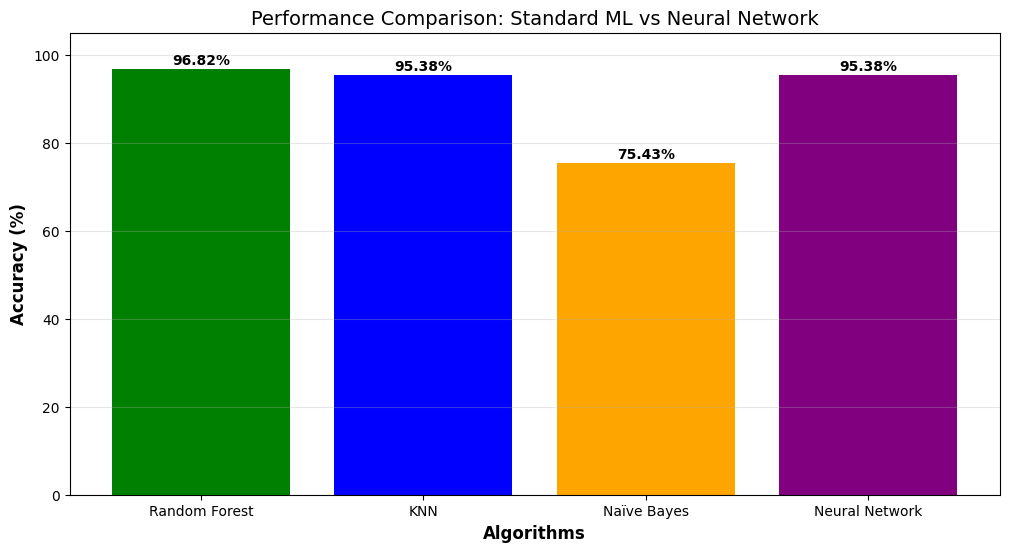

In [34]:
# Cell 14: Updated Model Comparison (Bar Chart)
import matplotlib.pyplot as plt

# Data for plotting
models = ['Random Forest', 'KNN', 'Naïve Bayes', 'Neural Network']
accuracies = [rf_accuracy * 100, knn_accuracy * 100, nb_accuracy * 100, mlp_accuracy * 100]
colors = ['green', 'blue', 'orange', 'purple']

# Create Bar Chart
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=colors)

plt.xlabel('Algorithms', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Performance Comparison: Standard ML vs Neural Network', fontsize=14)
plt.ylim(0, 105) # Give some space at top

# Add numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()

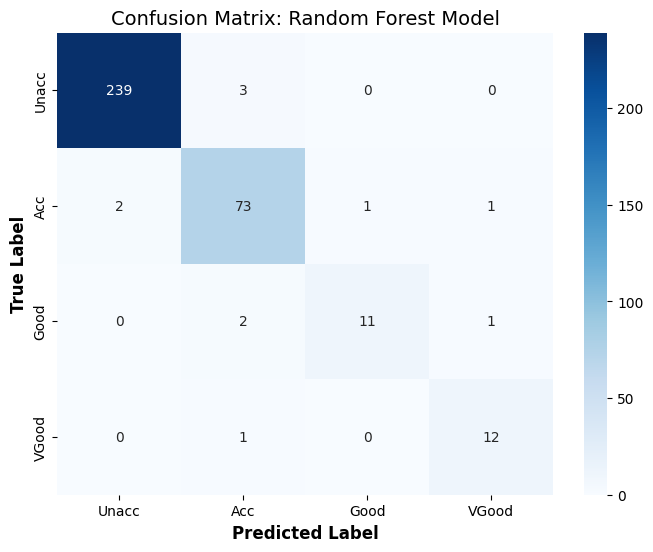

In [35]:
#Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the Confusion Matrix
# We use the predictions from Random Forest (rf_predictions)
cm = confusion_matrix(y_test, rf_predictions)

# 2. Define Class Names for the Plot
# 0=Unacc, 1=Acc, 2=Good, 3=VGood
class_names = ['Unacc', 'Acc', 'Good', 'VGood']

# 3. Create the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# 4. Add Labels
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix: Random Forest Model', fontsize=14)

plt.show()

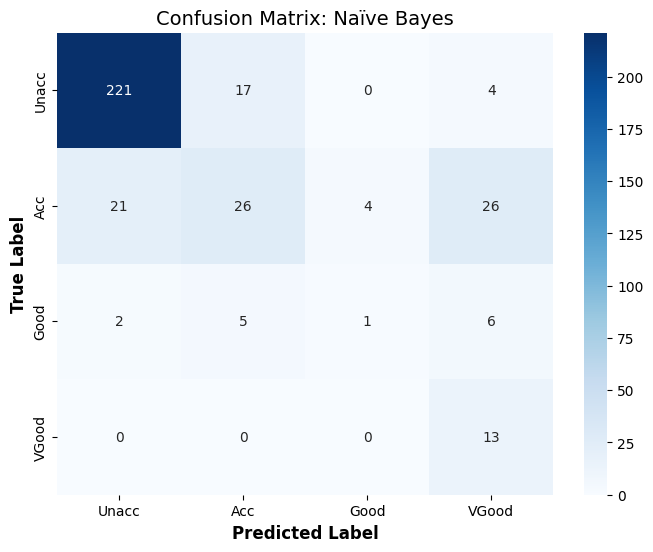

In [36]:
#Confusion Matrix - Naïve Bayes
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate Matrix using Naïve Bayes Predictions
cm_nb = confusion_matrix(y_test, nb_predictions)

# 2. Define Labels
class_names = ['Unacc', 'Acc', 'Good', 'VGood']

# 3. Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix: Naïve Bayes', fontsize=14)
plt.show()

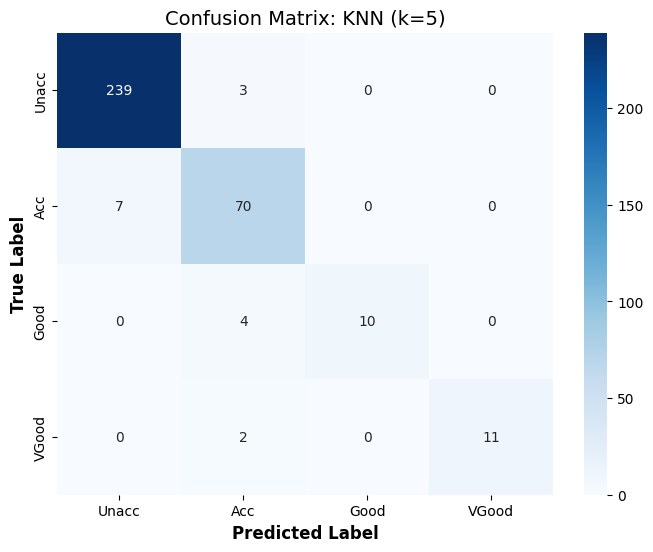

In [37]:
#Confusion Matrix - K-Nearest Neighbors (KNN)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate Matrix using KNN Predictions
cm_knn = confusion_matrix(y_test, knn_predictions)

# 2. Define Labels
class_names = ['Unacc', 'Acc', 'Good', 'VGood']

# 3. Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix: KNN (k=5)', fontsize=14)
plt.show()

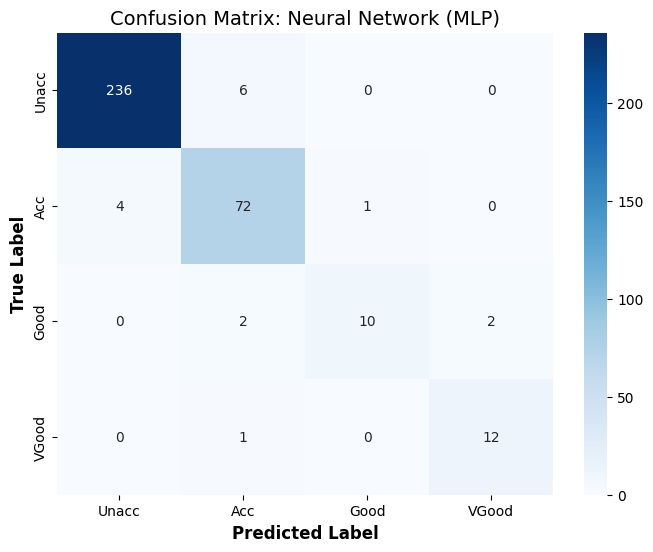

In [38]:
# Cell 16: Confusion Matrix - Neural Network (MLP)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate Matrix using Neural Network Predictions
# (Make sure you ran the training cell for mlp_model first)
cm_mlp = confusion_matrix(y_test, mlp_predictions)

# 2. Define Labels
class_names = ['Unacc', 'Acc', 'Good', 'VGood']

# 3. Plot Heatmap (Using Reds to match the ROC curve color)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# 4. Styling
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix: Neural Network (MLP)', fontsize=14)

plt.show()

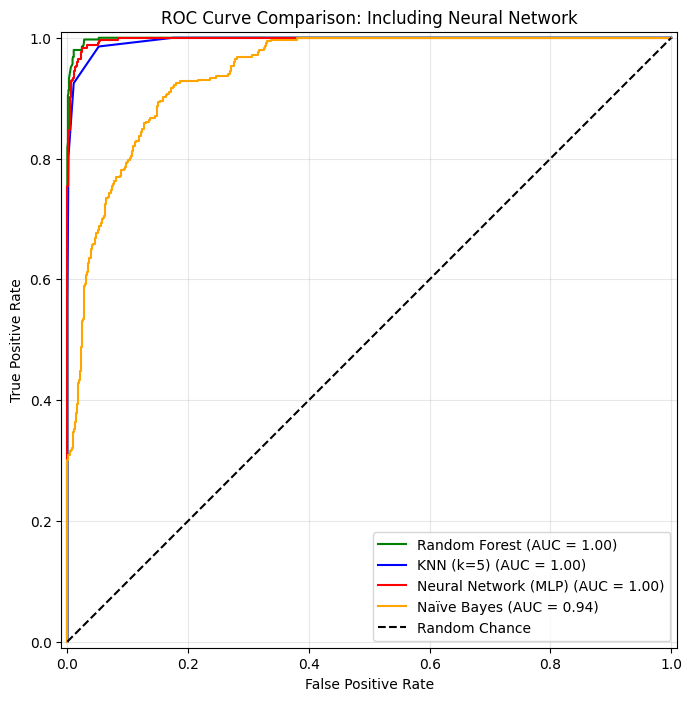

In [39]:
# Cell 15: Comparative ROC Curve (Including Neural Network)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

# 1. Prepare Data
classes = [0, 1, 2, 3]
y_test_bin = label_binarize(y_test, classes=classes)

# 2. Get Probability Scores for ALL 4 models
rf_prob = rf_model.predict_proba(X_test)
nb_prob = nb_model.predict_proba(X_test)
knn_prob = knn_model.predict_proba(X_test)
mlp_prob = mlp_model.predict_proba(X_test) # <--- New Neural Network Probs

# 3. Create the Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Random Forest (Green)
RocCurveDisplay.from_predictions(y_test_bin.ravel(), rf_prob.ravel(),
                                 name='Random Forest', color='green', ax=ax)

# Plot KNN (Blue)
RocCurveDisplay.from_predictions(y_test_bin.ravel(), knn_prob.ravel(),
                                 name='KNN (k=5)', color='blue', ax=ax)

# Plot Neural Network (Red) <--- NEW
RocCurveDisplay.from_predictions(y_test_bin.ravel(), mlp_prob.ravel(),
                                 name='Neural Network (MLP)', color='red', ax=ax)

# Plot Naïve Bayes (Orange)
RocCurveDisplay.from_predictions(y_test_bin.ravel(), nb_prob.ravel(),
                                 name='Naïve Bayes', color='orange', ax=ax)

# 4. Styling
ax.plot([0, 1], [0, 1], 'k--', label='Random Chance')
ax.set_title('ROC Curve Comparison: Including Neural Network')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.grid(True, alpha=0.3)
ax.legend()

plt.show()

In [40]:
def start_prediction_system():
    print("=== CAR EVALUATION AI SYSTEM ===")
    print("Please enter the following car details exactly as shown in brackets.\n")

    # 1. Define Mappings (Text -> Number)
    buying_map = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
    maint_map = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
    doors_map = {'2': 2, '3': 3, '4': 4, '5more': 5}
    persons_map = {'2': 2, '4': 4, 'more': 5}
    lug_map = {'small': 1, 'med': 2, 'big': 3}
    safety_map = {'low': 1, 'med': 2, 'high': 3}

    # Reverse Mapping (Number -> Text Result)
    class_map = {0: 'Unacceptable', 1: 'Acceptable', 2: 'Good', 3: 'Very Good'}

    try:
        # 2. Get User Inputs
        b = input("1. Buying Price (vhigh, high, med, low): ").strip().lower()
        if b not in buying_map: raise ValueError(f"Invalid price: {b}")

        m = input("2. Maint Cost (vhigh, high, med, low): ").strip().lower()
        if m not in maint_map: raise ValueError(f"Invalid maintenance: {m}")

        d = input("3. Number of Doors (2, 3, 4, 5more): ").strip().lower()
        if d not in doors_map: raise ValueError(f"Invalid doors: {d}")

        p = input("4. Capacity (2, 4, more): ").strip().lower()
        if p not in persons_map: raise ValueError(f"Invalid capacity: {p}")

        l = input("5. Luggage Boot (small, med, big): ").strip().lower()
        if l not in lug_map: raise ValueError(f"Invalid boot size: {l}")

        s = input("6. Safety (low, med, high): ").strip().lower()
        if s not in safety_map: raise ValueError(f"Invalid safety: {s}")

        # 3. Prepare Data
        features = np.array([[
            buying_map[b],
            maint_map[m],
            doors_map[d],
            persons_map[p],
            lug_map[l],
            safety_map[s]
        ]])

        # 4. Predict
        prediction_index = rf_model.predict(features)[0]
        result_text = class_map[prediction_index]

        # Get Probability
        probs = rf_model.predict_proba(features)
        confidence = np.max(probs) * 100

        # 5. Output Result
        print("\n" + "="*30)
        print(f"  PREDICTED RESULT: {result_text.upper()}")
        print(f"  AI Confidence:    {confidence:.2f}%")
        print("="*30 + "\n")

    except ValueError as e:
        print(f"\n[ERROR] {e}")
        print("Please run the cell again and enter correct values.")

# Run the system
start_prediction_system()

=== CAR EVALUATION AI SYSTEM ===
Please enter the following car details exactly as shown in brackets.

1. Buying Price (vhigh, high, med, low): med
2. Maint Cost (vhigh, high, med, low): high
3. Number of Doors (2, 3, 4, 5more): 4
4. Capacity (2, 4, more): 4
5. Luggage Boot (small, med, big): big
6. Safety (low, med, high): high

  PREDICTED RESULT: ACCEPTABLE
  AI Confidence:    94.00%



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


add neural network classifier
vanilla